In [2]:
#ndex2: download network from NDEx
import ndex2

network = ndex2.create_nice_cx_from_server('ndexbio.org', uuid='0f066d06-5d8e-11ea-bfdc-0ac135e8bacf')

In [1]:
#py4cytoscape: download network from NDEx
import py4cytoscape as py4

network_suid = py4.cy_ndex.import_network_from_ndex('0f066d06-5d8e-11ea-bfdc-0ac135e8bacf')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': '0f066d06-5d8e-11ea-bfdc-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


In [2]:
#ndex2: get a style template network and apply the style to the network
network.apply_template('ndexbio.org', '145a6a47-78ee-11e9-848d-0ac135e8bacf')

In [41]:
#py4cytoscape: get a style template network
py4.cy_ndex.import_network_from_ndex('145a6a47-78ee-11e9-848d-0ac135e8bacf')

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks), json: {'serverUrl': 'http://ndexbio.org/v2', 'uuid': '145a6a47-78ee-11e9-848d-0ac135e8bacf'}
[INFO] py4...S:  ǀOK[200]


7893

In [3]:
#py4cytoscape: apply the style to the network
py4.styles.set_visual_style('NDEx default style v2-Style', network=network_suid)

NameError: name 'py4' is not defined

{8780: array([-11.05863939,   5.62792853]), 8779: array([-6.94696254,  7.12880774]), 8778: array([-4.3631417 , 11.26746843]), 8777: array([-4.52496645, 17.0181806 ]), 8776: array([-8.08282391, 22.88136068]), 8775: array([-14.95959463,  27.1626835 ]), 8774: array([-24.3170448 ,  28.29776717]), 8773: array([-34.65799865,  25.16860315]), 8772: array([-44.0518378,  17.3579948]), 8771: array([-50.45065423,   5.29673841]), 8770: array([-52.04777215,  -9.72601201]), 8769: array([-47.62180371, -25.69804365]), 8768: array([-36.80936486, -40.15119039]), 8767: array([-20.25827284, -50.52505411]), 8766: array([  0.37058368, -54.57542477]), 8765: array([ 22.56268003, -50.76599837]), 8764: array([ 43.25635146, -38.58139349]), 8763: array([ 59.25899174, -18.70814467]), 8762: array([67.71703714,  6.95264218]), 8761: array([66.57270015, 35.45413552]), 8760: array([54.93864592, 63.14112968]), 8759: array([33.3300039 , 86.11741756]), 8758: array([  3.71049589, 100.78358371]), 8757: array([-30.66607965, 1

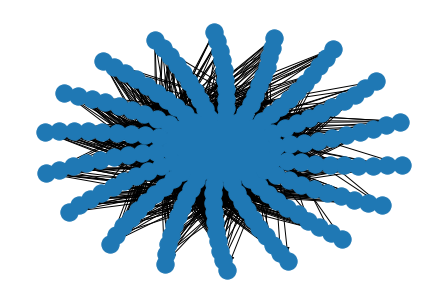

In [6]:
#ndex2: apply a layout to the network
import networkx as nx

#Make and view layout
networkx_network = network.to_networkx(mode='default')
pos = nx.drawing.layout.spiral_layout(networkx_network, scale=1000)
#Other layouts to try:
    #circular_layout
    #random_layout
    #spiral_layout
    #spring_layout
nx.draw(networkx_network, pos)

#Transfer layout back to original network
new_cartesian_layout = []
for node_id, coordinates in pos.items():
    new_cartesian_layout.append({
        'node': node_id,
        'x': coordinates[0],
        'y': coordinates[1]
    })
network.set_opaque_aspect(ndex2.constants.CARTESIAN_LAYOUT_ASPECT, new_cartesian_layout)

In [48]:
#py4cytoscape: apply a layout to the network
py4.layouts.get_layout_names()
py4.layouts.layout_network('circular', network=network_suid)

[INFO] py4...S:  ǀHTTP GET(http://localhost:1234/v1/apply/layouts)
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/layout/circular), data: b'{"network": "SUID:8172"}'
[INFO] py4...S:  ǀOK[200]


{}

In [7]:
#ndex2: save the network to your account in NDEx
network.upload_to('ndexbio.org', 'sol015', 'test')

Generating CX


'http://public.ndexbio.org/v2/network/51884c5c-b713-11ea-aaef-0ac135e8bacf'

In [50]:
#py4cytoscape: save the network to your account in NDEx
py4.cy_ndex.export_network_to_ndex('sol015', 'test', True, network=network_suid)

[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/cyndex2/v1/networks/8172), json: {'serverUrl': 'http://ndexbio.org/v2', 'username': 'sol015', 'password': 'test', 'metadata': None, 'isPublic': True}
[INFO] py4...S:  ǀOK[200]


'9a8e116d-b44b-11ea-aaef-0ac135e8bacf'

In [3]:
#ndex2: load protein interaction tabular data as a PPI network
import pandas as pd
ppi_data = pd.read_csv('~/Desktop/ap-ms-demodata.csv', sep=',')

ppi_network = ndex2.create_nice_cx_from_pandas(ppi_data)

In [18]:
#py4cytoscape: load protein interaction tabular data as a PPI network
#py4.networks.import_network_from_file()#'/Users/sophieliu/Desktop/ap-ms-demodata.csv')

import pandas as pd
ppi_data = pd.read_csv('~/Desktop/ap-ms-demodata.csv', sep=',')
ppi_data = ppi_data.rename(columns={'Bait': 'source', 'Prey': 'target'})

py4.networks.create_network_from_data_frames(edges=ppi_data)

[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/networks), params: {'title': 'From dataframe', 'collection': 'My Dataframe Network Collection'}, json: {'data': [{'name': 'From dataframe'}], 'elements': {'nodes': [{'data': {'id': 'GAG'}}, {'data': {'id': 'THRAP3'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'SEPSECS'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'IVNS1ABP'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'DDX49'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'PRMT1'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'OLA1'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'EIF2AK2'}}, {'data': {'id': 'GAG'}}, {'data': {'id': 'RBM17'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'EPRS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'OLA1'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'SEPSECS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'EEF1E1'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'DARS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'RARS'}}, {'data': {'id': 'MA'}}, {'data': {'id': 'AIMP1'}}, {'d

[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns/id)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns)
[INFO] py4...S: 

[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultedge/columns)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultedge/columns/SUID)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultedge/columns/name)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO

[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀHTTP POST(http://localhost:1234/v1/commands/vizmap/apply), data: b'{"styles": "default"}'
[INFO] py4...S:  ǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/layout/apply%20preferred), data: b'{"networkSelected": "SUID:4487"}'


Applying default style...
Applying preferred layout


[INFO] py4...S:  ǀǀOK[200]


{'networkSUID': 4487}

In [13]:
#ndex2: annotate the PPI network with tabular gene expression data


In [20]:
#py4cytoscape: annotate the PPI network with tabular gene expression data
annotation_data = pd.read_csv('~/Desktop/annotationData.csv', sep=',')
annotation_data

py4.tables.load_table_data(annotation_data, data_key_column='GeneSymbol')

[INFO] py4...S:  ǀǀHTTP POST(http://localhost:1234/v1/commands/network/get%20attribute), data: b'{"network": "current", "namespace": "default", "columnList": "SUID"}'
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀǀHTTP GET(http://localhost:1234/v1/networks)
[INFO] py4...S:  ǀǀǀǀOK[200]
[INFO] py4...S:  ǀǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns)
[INFO] py4...S:  ǀǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns/SUID)
[INFO] py4...S:  ǀǀOK[200]
[INFO] py4...S:  ǀǀHTTP GET(http://localhost:1234/v1/networks/4487/tables/defaultnode/columns/name)
[INFO] py4...S:  ǀǀOK[200]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/py4cytoscape-0.0.1-py3.8.egg/py4cytoscape/tables.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

'Success: Data loaded in defaultnode table'